In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data collection and analysis

In [ ]:
df=pd.read_csv('/content/bigmart sales.csv')
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


in productid first 2 characters are type of foods

1.FD means food items

2.NC means non consumable items

3.DR means drinks

third letter in product id represents sub categories represents what  type of food it is and number represent nique identifier for the product

productvisibility :
It quantifies the level of exposure a product receives in the store, based on its placement on shelves, end-caps, or promotional displays.

OutletID :                                                             it is a unique identifier for each retail outlet where products are sold. It helps to distinguish between different stores in the dataset.

In [ ]:
print(df['ProductID'].str[:2].value_counts())
print(df['ProductID'].str[2:3].value_counts())

ProductID
FD    6125
NC    1599
DR     799
Name: count, dtype: int64
ProductID
X    354
K    345
H    342
O    340
I    338
R    338
L    338
S    338
Y    333
Z    331
D    330
Q    328
T    328
B    328
G    326
J    324
F    324
V    322
E    322
P    321
N    321
A    318
W    316
U    313
C    304
M    301
Name: count, dtype: int64


In [ ]:
df.describe()


,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.dtypes

,0
ProductID,object
Weight,float64
FatContent,object
ProductVisibility,float64
ProductType,object
MRP,float64
OutletID,object
EstablishmentYear,int64
OutletSize,object
LocationType,object


In [ ]:
df.isnull().sum()

,0
ProductID,0
Weight,1463
FatContent,0
ProductVisibility,0
ProductType,0
MRP,0
OutletID,0
EstablishmentYear,0
OutletSize,2410
LocationType,0


In [ ]:
df.isnull().sum()*100/len(df)

,0
ProductID,0.000000
Weight,17.165317
FatContent,0.000000
ProductVisibility,0.000000
ProductType,0.000000
MRP,0.000000
OutletID,0.000000
EstablishmentYear,0.000000
OutletSize,28.276428
LocationType,0.000000


duplicated values

In [ ]:
df.duplicated().any()

False

handling missing values
1.univariate imputations

In [ ]:
mean_weight=df['Weight'].mean()
df['mean_weight']=df['Weight'].fillna(mean_weight)
median_weight=df['Weight'].median()
df['median_weight']=df['Weight'].fillna(median_weight)



In [ ]:
df.iloc[20:80]

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,mean_weight,median_weight
20,FDN22,18.850,Regular,0.138190,Snack Foods,250.8724,OUT013,1987,High,Tier 3,Supermarket Type1,3775.0860,18.850000,18.850
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,12.857645,12.600
22,NCB30,14.600,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672,14.600000,14.600
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,12.857645,12.600
24,FDR28,13.850,Regular,0.025896,Frozen Foods,165.0210,OUT046,1997,Small,Tier 1,Supermarket Type1,4078.0250,13.850000,13.850
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,13.000000,13.000
26,FDV10,7.645,Regular,0.066693,Snack Foods,42.3112,OUT035,2004,Small,Tier 2,Supermarket Type1,1065.2800,7.645000,7.645
27,DRJ59,11.650,low fat,0.019356,Hard Drinks,39.1164,OUT013,1987,High,Tier 3,Supermarket Type1,308.9312,11.650000,11.650
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,5.925000,5.925
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,12.857645,12.600


In [ ]:
print("original varience before imputation",df['Weight'].var())
print("mean_varience after imputation",df['mean_weight'].var())
print("median_varience after imputation",df['median_weight'].var())


original varience before imputation 21.56168825983637
mean_varience after imputation 17.860121735060453
median_varience after imputation 17.869561454073366


here mode weight doesnt work bcoz it may have multiple modes so we give first mode value

Which Imputation Method is Best?

The best imputation method depends on your specific goals and the characteristics of your data. Here's a general guideline:

Mean/Median Imputation: These methods are suitable when you want to minimize the impact of missing values on the overall distribution of the data. However, they can underestimate the true variance and potentially distort relationships between variables.

Mode Imputation: This method is preferred when you want to preserve the original variability of the data. It's particularly useful for categorical or discrete variables where replacing missing values with the most frequent category makes sense.

In [ ]:
mode_weight=df['Weight'].mode()[0]
df['mode_weight']=df['Weight'].fillna(mode_weight)
print("mode_varience after imputation",df['mode_weight'].var())

mode_varience after imputation 17.931332576867376


checking whether imputation results change in the distribution of data


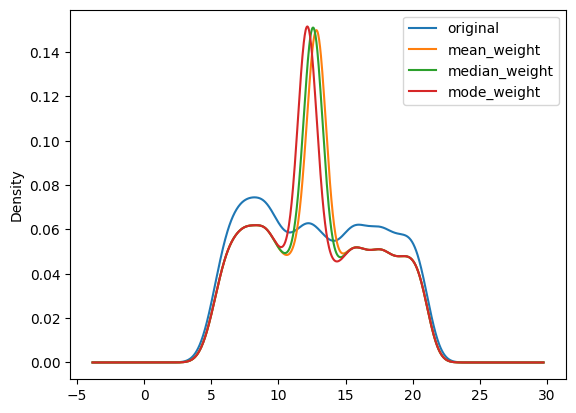

In [ ]:
df['Weight'].plot(kind='kde',label="original")
df['mean_weight'].plot(kind='kde',label="mean_weight")
df['median_weight'].plot(kind='kde',label="median_weight")
df['mode_weight'].plot(kind='kde',label="mode_weight")
plt.legend()
plt.show()

<Axes: >

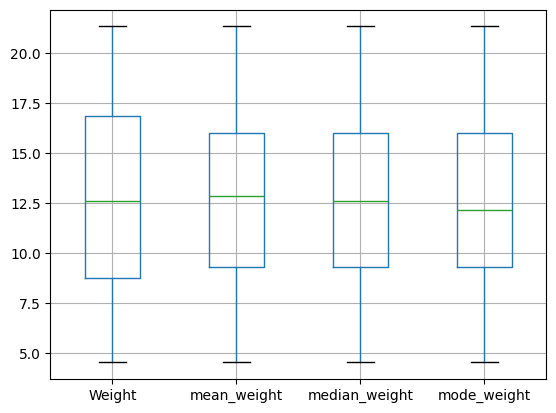

In [ ]:
df[['Weight','mean_weight','median_weight','mode_weight']].boxplot()

clearly distriibution is completely changed after central tendency imputation

Box plots (also known as box-and-whisker plots) are used to visually summarize and compare the distribution of numerical data across different groups or categories. They provide a concise way to understand the central tendency, spread, and potential outliers within a dataset.

 The box itself spans the interquartile range, which is the distance between the first quartile (25th percentile) and the third quartile (75th percentile). The IQR represents the middle 50% of the data and provides a measure of the data's spread.

2.using interpolation method(linear line)
as imputation

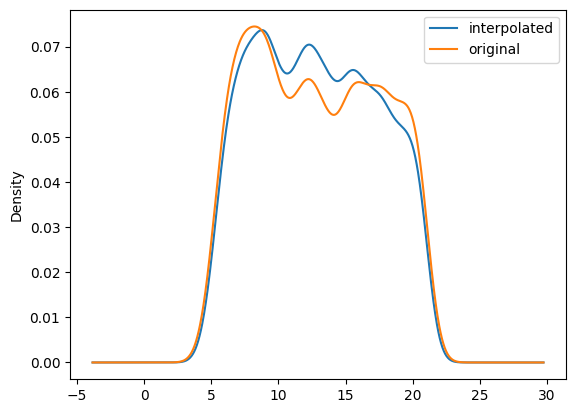

In [ ]:
df['weight_interpolated']=df['Weight'].interpolate(method='linear')
df['weight_interpolated'].plot(kind='kde',label="interpolated")
df['Weight'].plot(kind='kde',label="original")
plt.legend()
plt.show()

it is better than central tendency interpolation.because distribution curve some what similar to original data. so we use interpolated_weights for missing values


2.multivariate imputation
(1.KNN imputataion)


In [ ]:
from sklearn.impute import KNNImputer

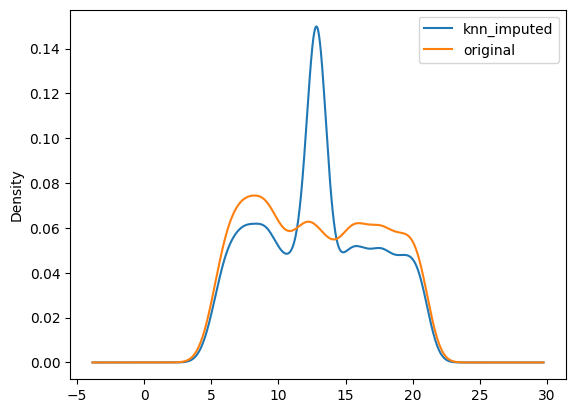

In [ ]:
knn=KNNImputer(n_neighbors=100)
df['knn_imputed']=knn.fit_transform(df[['Weight']])
df['knn_imputed'].plot(kind='kde',label="knn_imputed")
df['Weight'].plot(kind='kde',label="original")
plt.legend()
plt.show()

Knn imputation also doesnt work good than interpolation based imputation


In [ ]:
df = df.drop(['mean_weight','median_weight','mode_weight','knn_imputed','Weight'],axis=1)
df.head()


,ProductID,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,weight_interpolated
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


categorical missing values

In [ ]:
df['LocationType'].value_counts()


,count
LocationType,
Tier 3,3350
Tier 2,2785
Tier 1,2388


In [ ]:
df['OutletSize'].value_counts()

,count
OutletSize,
Medium,2793
Small,2388
High,932


In [ ]:
df['OutletType'].value_counts()

,count
OutletType,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


we will fill missing values of outletsize using outlet type
using mode

here we fill  missing values in the OutletSize column of a DataFrame df based on the most common (mode) OutletSize for each OutletType


In [ ]:

df['OutletType'] = df['OutletType'].str.strip()
mode_outlet = df.pivot_table(values='OutletSize', index='OutletType', aggfunc=lambda x: x.mode()[0] if len(x) > 0 else np.nan)
missing_values = df['OutletSize'].isnull()
df.loc[missing_values, 'OutletSize'] = df.loc[missing_values, 'OutletType'].apply(lambda x: mode_outlet.loc[x] if x in mode_outlet.index else np.nan)
df.head()

,ProductID,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,weight_interpolated
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [ ]:
df.isnull().sum()

,0
ProductID,0
FatContent,0
ProductVisibility,0
ProductType,0
MRP,0
OutletID,0
EstablishmentYear,0
OutletSize,0
LocationType,0
OutletType,0


In [ ]:
df.columns

Index(['ProductID', 'FatContent', 'ProductVisibility', 'ProductType', 'MRP',
       'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales', 'weight_interpolated'],
      dtype='object')

In [ ]:
df['OutletID'].value_counts()

,count
OutletID,
OUT027,935
OUT013,932
OUT049,930
OUT046,930
OUT035,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


In [ ]:
df['FatContent'].value_counts()

,count
FatContent,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
df.replace({'FatContent':{'Low Fat':'LF','low fat':'LF','Regular':'reg'}},inplace=True)
df['FatContent'].value_counts()

,count
FatContent,
LF,5517
reg,3006


In [ ]:
df['ProductVisibility'].value_counts()

,count
ProductVisibility,
0.000000,526
0.076975,3
0.162462,2
0.076841,2
0.073562,2
...,...
0.013957,1
0.110460,1
0.124646,1


we need to replace 0 with NAN
do interpolation


In [ ]:
df['ProductVisibility_interpolate']=df['ProductVisibility'].replace(0,np.nan).interpolate(method='linear')


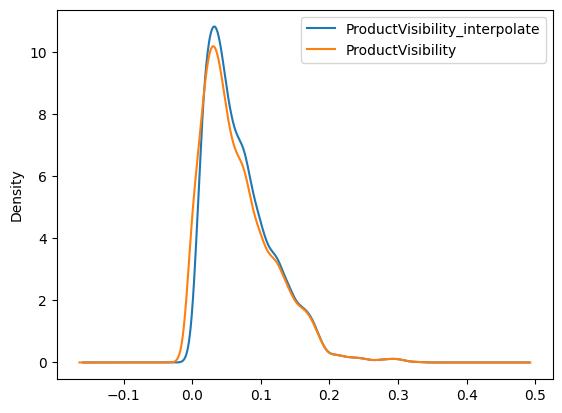

In [ ]:
df['ProductVisibility_interpolate'].plot(kind='kde')
df['ProductVisibility'].plot(kind='kde')
plt.legend()
plt.show()

In [ ]:
df.drop(['ProductVisibility'],axis=1,inplace=True)
df.head()

,ProductID,FatContent,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,weight_interpolated,ProductVisibility_interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,reg,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,LF,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,reg,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,LF,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


In [ ]:
df.columns

Index(['ProductID', 'FatContent', 'ProductType', 'MRP', 'OutletID',
       'EstablishmentYear', 'OutletSize', 'LocationType', 'OutletType',
       'OutletSales', 'weight_interpolated', 'ProductVisibility_interpolate'],
      dtype='object')

In [ ]:
df['OutletType'].value_counts()

,count
OutletType,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [ ]:
df['ProductID'].value_counts()

,count
ProductID,
FDW13,10
FDG33,10
NCY18,9
FDD38,9
DRE49,9
...,...
FDY43,1
FDQ60,1
FDO33,1


In [ ]:
df['EstablishmentYear'].value_counts()

,count
EstablishmentYear,
1985,1463
1987,932
1999,930
1997,930
2004,930
2002,929
2009,928
2007,926
1998,555


In [ ]:
import datetime as dt

In [ ]:
curr_year=dt.datetime.today().year
curr_year

2025

In [ ]:
df['Establishmentage']=curr_year-df['EstablishmentYear']
df.head()

,ProductID,FatContent,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,weight_interpolated,ProductVisibility_interpolate,Establishmentage
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,26
1,DRC01,reg,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,16
2,FDN15,LF,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,26
3,FDX07,reg,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,27
4,NCD19,LF,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,38


In [ ]:
df['ProductID'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [ ]:
df['ProductType'].value_counts()

,count
ProductType,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [ ]:
df.drop(['EstablishmentYear'],axis=1,inplace=True)

In [ ]:
col=df.columns
non_cat_col=[]
for i in col:
  if (df[i].dtype=='float' or df[i].dtype=='int64') and i!='OutletSales':
    non_cat_col.append(i)
non_cat_col

['MRP',
 'weight_interpolated',
 'ProductVisibility_interpolate',
 'Establishmentage']

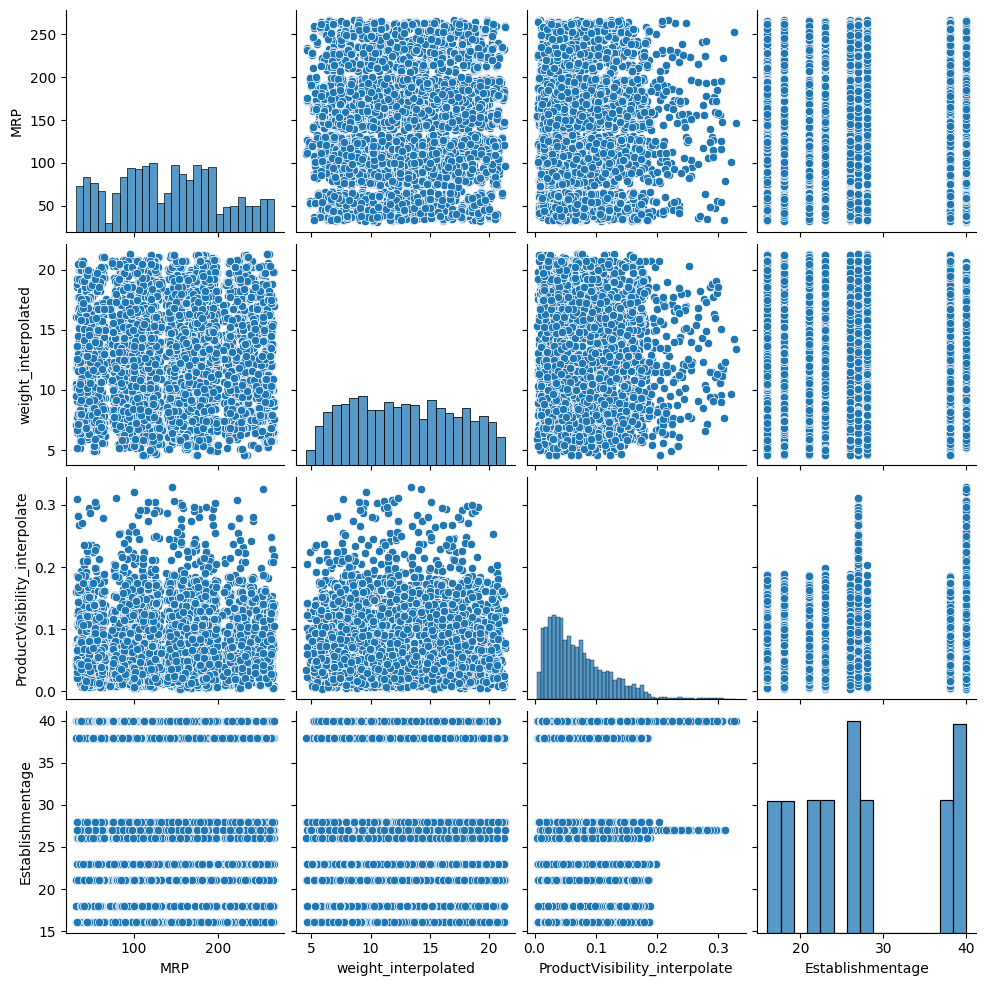

In [ ]:
sns.pairplot(df[non_cat_col])
plt.show()

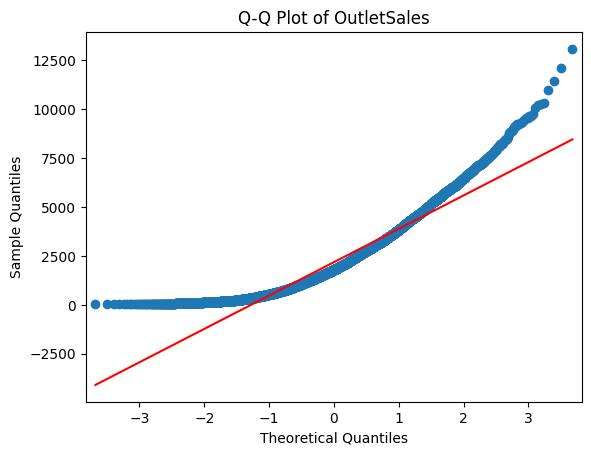

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(df['OutletSales'], line='s')
plt.title('Q-Q Plot of OutletSales')
plt.show()

handling categorical columns into numerical

1.using ordinal encoder for all categorical data

2.using one hot encoder for all categorical data(it's taking too much time for execution)

3.using both ordinal and one hot encoding for certain features

           a. nominal encoder(one hot encoder)
                    1.pdct type
                    2.pdct Id
                    3.outlet Id
                    
           b.ordinal encoder
                    1.fat content
                    2.outlet size
                    3.location type

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
df.to_csv('cleaned_data.csv')
df1,df2,df3=df.copy(),df.copy(),df.copy()
a=OrdinalEncoder()
b=OneHotEncoder()

In [ ]:
# ordinal encoding
for i in df1.columns:
  if df1[i].dtype=='object':
    df1[i]=a.fit_transform(df1[[i]])
print(df1.head())


# mixed encoding
for i in df2.columns:
  if df2[i].dtype=='object':
    if i in ['FatContent','OutletSize','LocationType']:
      df2[i]=a.fit_transform(df3[[i]])
    else:
      encoded_data = b.fit_transform(df3[[i]]).toarray()
      encoded_df = pd.DataFrame(encoded_data, columns=[f'{i}_{j}' for j in range(encoded_data.shape[1])], index=df3.index)
      df2 = pd.concat([df2, encoded_df], axis=1)
      df2.drop(columns=[i], inplace=True)
print(df2.head())

   ProductID  FatContent  ProductType       MRP  OutletID  OutletSize  \
0      156.0         0.0          4.0  249.8092       9.0         1.0   
1        8.0         1.0         14.0   48.2692       3.0         1.0   
2      662.0         0.0         10.0  141.6180       9.0         1.0   
3     1121.0         1.0          6.0  182.0950       0.0         2.0   
4     1297.0         0.0          9.0   53.8614       1.0         0.0   

   LocationType  OutletType  OutletSales  weight_interpolated  \
0           0.0         1.0    3735.1380                 9.30   
1           2.0         2.0     443.4228                 5.92   
2           0.0         1.0    2097.2700                17.50   
3           2.0         0.0     732.3800                19.20   
4           2.0         1.0     994.7052                 8.93   

   ProductVisibility_interpolate  Establishmentage  
0                       0.016047                26  
1                       0.019278                16  
2          

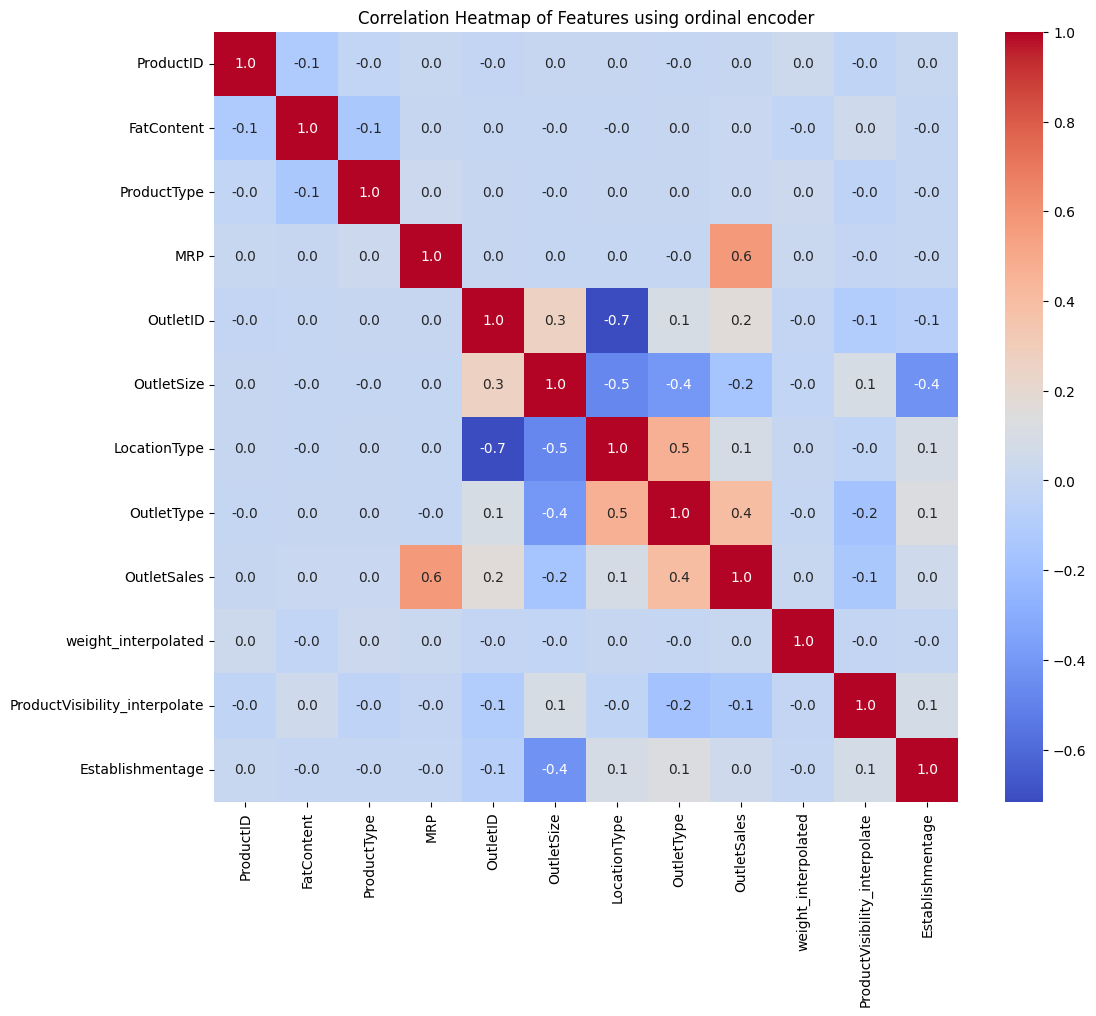

In [ ]:
correlation_matrix = df1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap of Features using ordinal encoder')
plt.show()

by using one hot encoder take much time so we use label encoder only



In [ ]:
df1

,ProductID,FatContent,ProductType,MRP,OutletID,OutletSize,LocationType,OutletType,OutletSales,weight_interpolated,ProductVisibility_interpolate,Establishmentage
0,156.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.300,0.016047,26
1,8.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.920,0.019278,16
2,662.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.500,0.016760,26
3,1121.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.200,0.015755,27
4,1297.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.930,0.014751,38
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,0.0,13.0,214.5218,1.0,0.0,2.0,1.0,2778.3834,6.865,0.056783,38
8519,897.0,1.0,0.0,108.1570,7.0,2.0,1.0,1.0,549.2850,8.380,0.046982,23
8520,1357.0,0.0,8.0,85.1224,6.0,2.0,1.0,1.0,1193.1136,10.600,0.035186,21
8521,681.0,1.0,13.0,103.1332,3.0,1.0,2.0,2.0,1845.5976,7.210,0.145221,16


In [ ]:
x=df1.drop('OutletSales',axis=1)
y=df1['OutletSales']
x

,ProductID,FatContent,ProductType,MRP,OutletID,OutletSize,LocationType,OutletType,weight_interpolated,ProductVisibility_interpolate,Establishmentage
0,156.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,9.300,0.016047,26
1,8.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,5.920,0.019278,16
2,662.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,17.500,0.016760,26
3,1121.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,19.200,0.015755,27
4,1297.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,8.930,0.014751,38
...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,0.0,13.0,214.5218,1.0,0.0,2.0,1.0,6.865,0.056783,38
8519,897.0,1.0,0.0,108.1570,7.0,2.0,1.0,1.0,8.380,0.046982,23
8520,1357.0,0.0,8.0,85.1224,6.0,2.0,1.0,1.0,10.600,0.035186,21
8521,681.0,1.0,13.0,103.1332,3.0,1.0,2.0,2.0,7.210,0.145221,16


In [ ]:
y

,OutletSales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


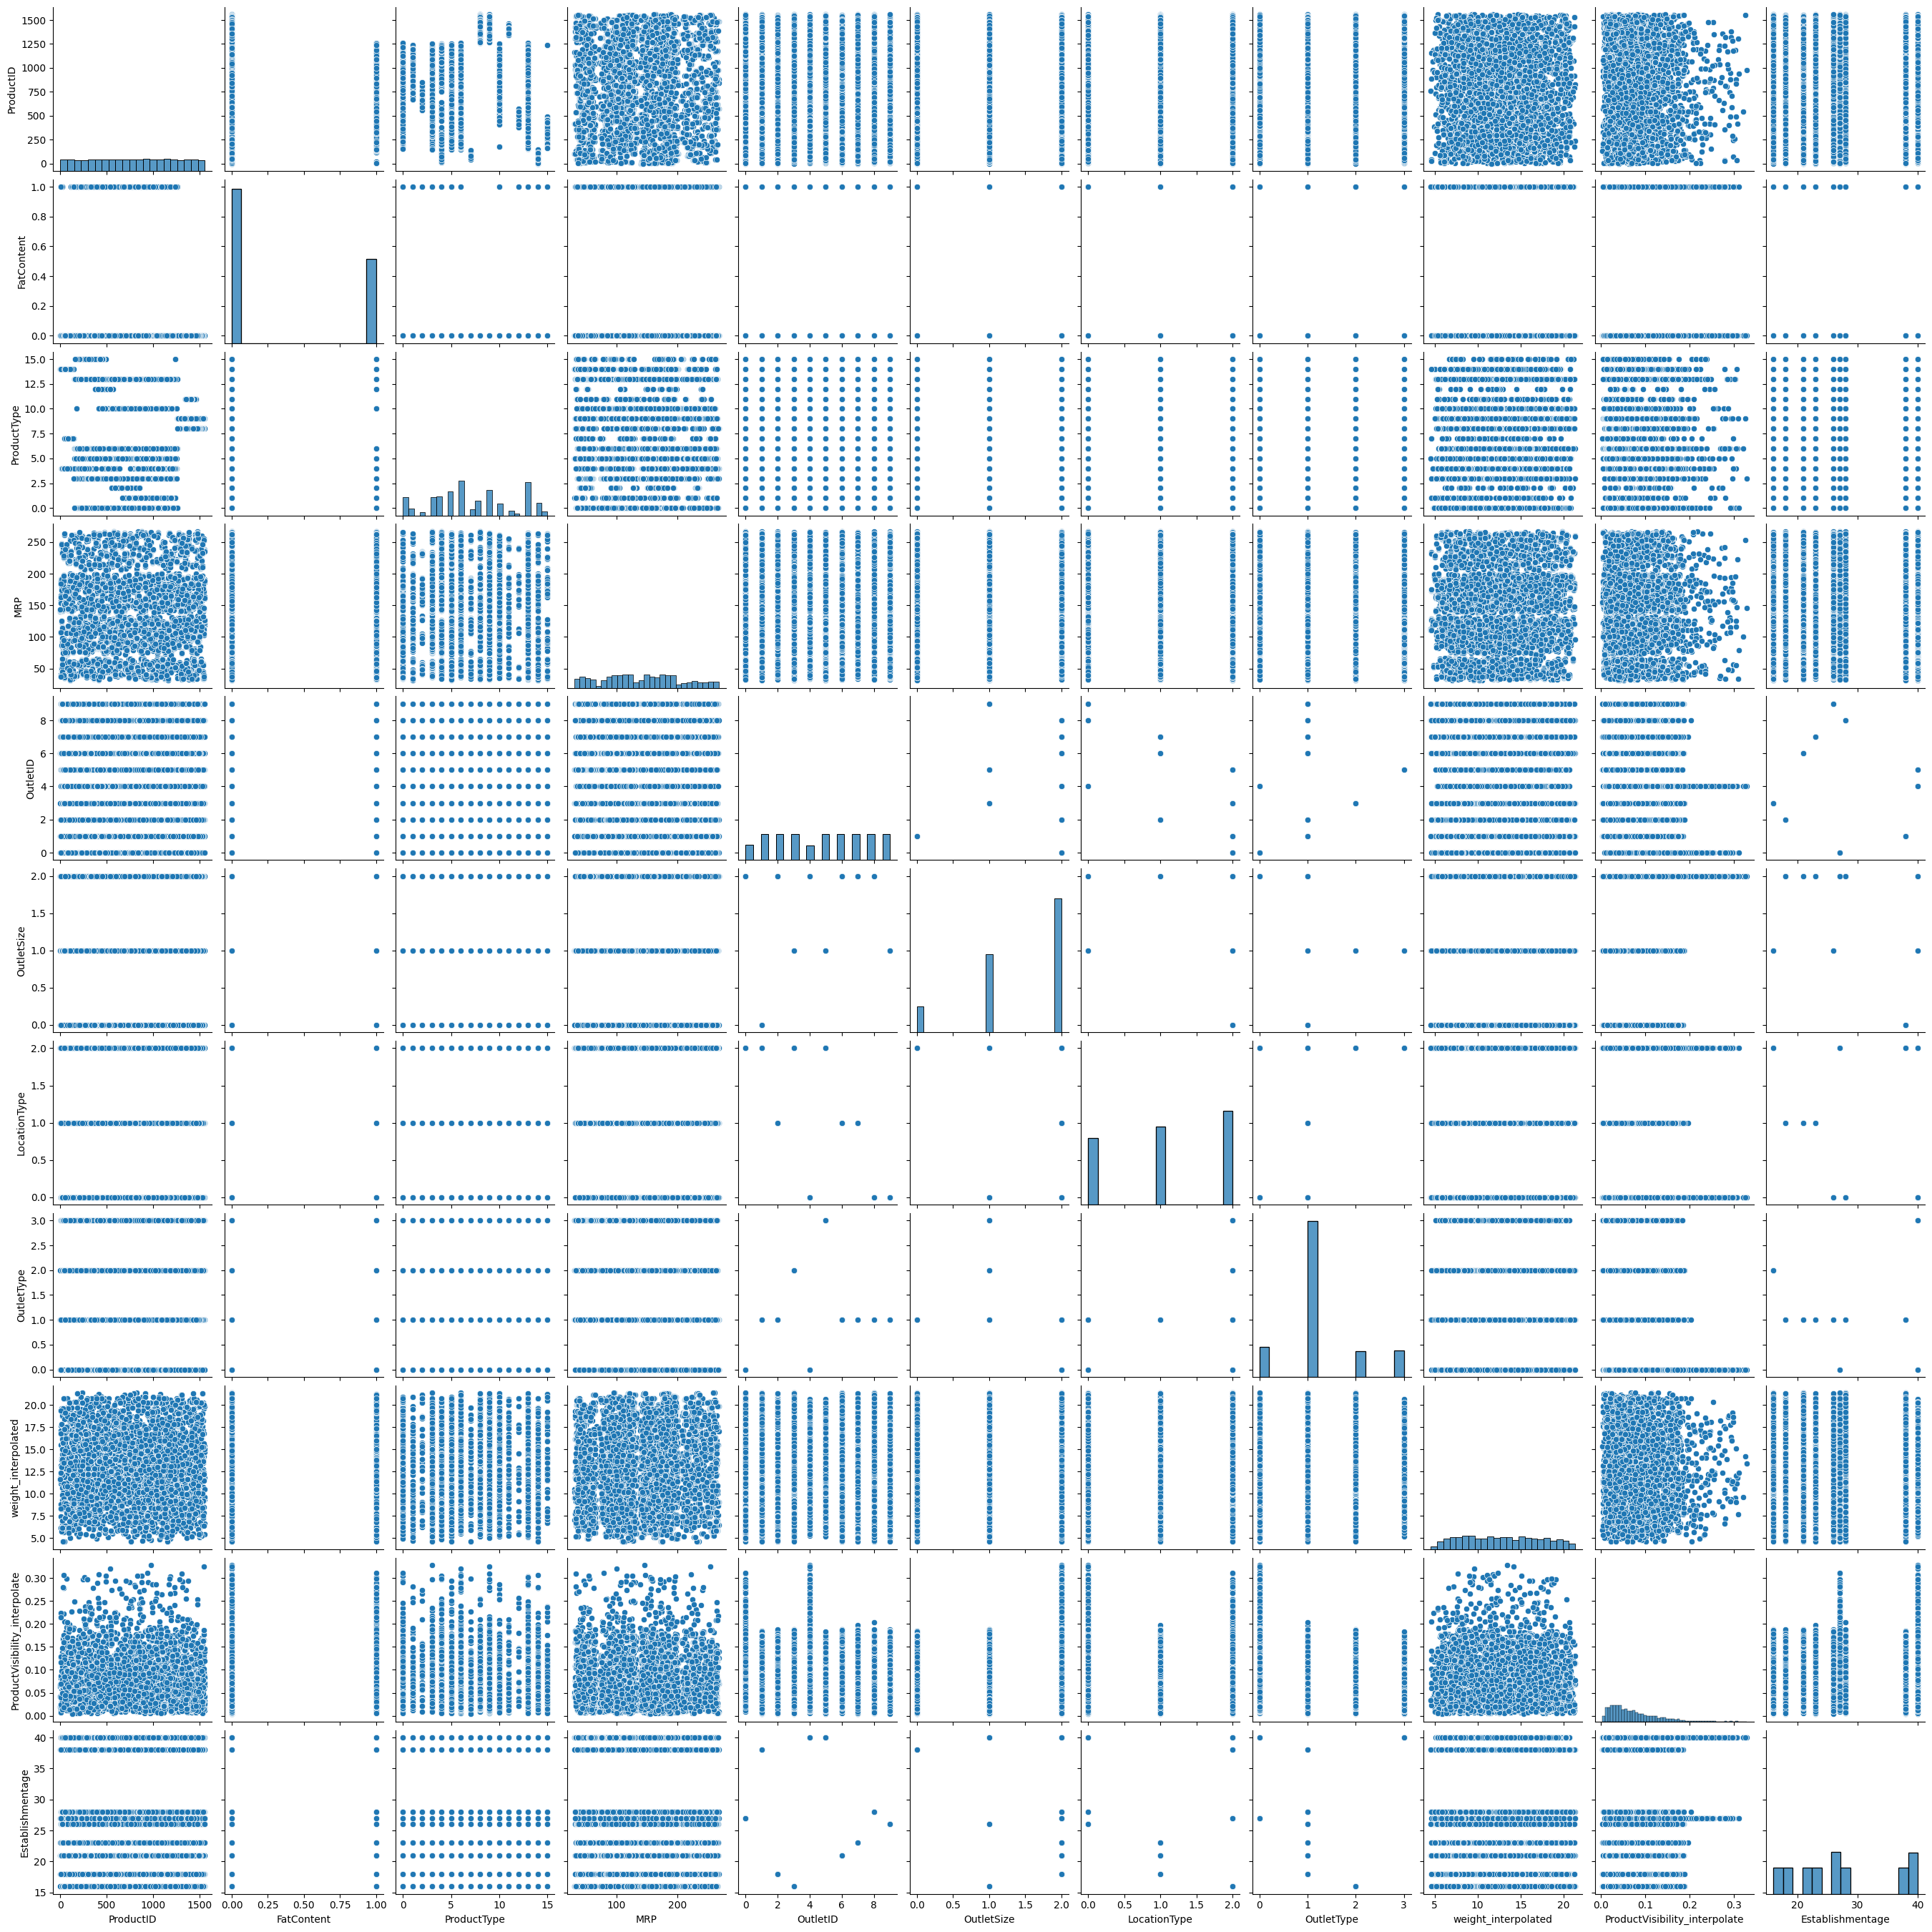

In [ ]:
sns.pairplot(x[['ProductID', 'FatContent', 'ProductType', 'MRP', 'OutletID',
       'OutletSize', 'LocationType', 'OutletType', 'weight_interpolated',
       'ProductVisibility_interpolate', 'Establishmentage']])
plt.show()

splitting data into train and test data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6818, 11), (1705, 11), (6818,), (1705,))

models for regression

1.linear regression

2.svm(support vector machines)

3.decision tree regression

4.lasso regression

5.ridge regression

6.random forest regressor

7.xgb regressor

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print("score on train data",scores.mean())
scores1=cross_val_score(lr,x_test,y_test,cv=5,scoring='r2')
print("score on test data",scores1.mean())

score on train data 0.5045996614078373
score on test data 0.48357670738452574


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
svr=SVR()
scores=cross_val_score(svr,x_train,y_train,cv=5,scoring='r2')
print("score on train data",scores.mean())
scores1=cross_val_score(svr,x_test,y_test,cv=5,scoring='r2')
print("score on test data",scores1.mean())

score on train data -0.038303125119261504
score on test data -0.06142209436558734


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
dt=DecisionTreeRegressor()
scores=cross_val_score(dt,x_train,y_train,cv=5,scoring='r2')
print("score on train data",scores.mean())
scores1=cross_val_score(dt,x_test,y_test,cv=5,scoring='r2')
print("score on test data",scores1.mean())

score on train data 0.19751399079905324
score on test data 0.08604151462729523


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
lasso=Lasso()
scores=cross_val_score(lasso,x_train,y_train,cv=5,scoring='r2')
print("score on train data",scores.mean())
scores1=cross_val_score(lasso,x_test,y_test,cv=5,scoring='r2')
print("score on test data",scores1.mean())

score on train data 0.504443664791083
score on test data 0.483414651279254


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
ridge=Ridge()
scores=cross_val_score(ridge,x_train,y_train,cv=5,scoring='r2')
print("score on train data",scores.mean())
scores1=cross_val_score(ridge,x_test,y_test,cv=5,scoring='r2')
print("score on test data",scores1.mean())

score on train data 0.5046024226814378
score on test data 0.4834003126478416


ML model using Random forest regressor

using XGbooster

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

xgb = XGBRegressor()
# Ensure x_train and y_train are compatible with xgboost
# If they are pandas DataFrames, convert them to NumPy arrays
import pandas as pd
if isinstance(x_train, pd.DataFrame):
  x_train = x_train.to_numpy()
if isinstance(y_train, pd.Series):
  y_train = y_train.to_numpy()

scores = cross_val_score(xgb, x_train, y_train, cv=5, scoring='r2')
print("score on train data", scores.mean())

# Similar conversion for x_test and y_test
if isinstance(x_test, pd.DataFrame):
  x_test = x_test.to_numpy()
if isinstance(y_test, pd.Series):
  y_test = y_test.to_numpy()

scores1 = cross_val_score(xgb, x_test, y_test, cv=5, scoring='r2')
print("score on test data", scores1.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRFregressor feature importance

In [ ]:
xgb1=XGBRegressor(n_estimators=100,random_state=42).fit(x_train,y_train)
pd.DataFrame(xgb1.feature_importances_,index=x_train.columns,columns=['importance']).sort_values(by='importance',ascending=False)

so we can consider first 6 features as important features and build model on these features


In [ ]:
xgb=XGBRegressor(n_estimators=100,random_state=42).fit(x_train,y_train)
selected_features = ['MRP', 'LocationType', 'OutletType', 'weight_interpolated', 'ProductVisibility_interpolate', 'Establishmentage']
scores=cross_val_score(xgb,x_train[selected_features],y_train,cv=5,scoring='r2')
print("score on train data",scores.mean())
scores1=cross_val_score(xgb,x_test[selected_features],y_test,cv=5,scoring='r2')
print("score on test data",scores1.mean())

In [ ]:
#durbin watson test used for independence
from statsmodels.stats.stattools import durbin_watsont
y_pred = final_xgb.predict(x_test[selected_features])
residuals = y_test - y_pred
dw_statistic = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_statistic)
if dw_statistic < 2:
    print("Positive autocorrelation detected.")
elif dw_statistic > 2:
    print("Negative autocorrelation detected.")
else:
    print("No significant autocorrelation detected.")

In [ ]:
# residual plot check for homoscedasticity
y_pred = final_xgb.predict(x_test[selected_features])
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred=xgb.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
print("mean absolute error",mae)


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
}
xgb = XGBRegressor(n_estimators=100, random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, verbose=2)
selected_features = ['MRP', 'LocationType', 'OutletType', 'weight_interpolated', 'ProductVisibility_interpolate', 'Establishmentage']
grid_search.fit(x_train[selected_features], y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(x_test[selected_features])
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
x_train['MRP_LocationType_Interaction'] = x_train['MRP'] * x_train['LocationType']
x_test['MRP_LocationType_Interaction'] = x_test['MRP'] * x_test['LocationType']
selected_features = ['MRP', 'LocationType', 'OutletType',
                    'weight_interpolated', 'ProductVisibility_interpolate',
                    'Establishmentage', 'MRP_LocationType_Interaction']
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}
xgb = XGBRegressor(n_estimators=100, random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=5,
                           verbose=2, n_jobs=-1) # n_jobs=-1 for parallel processing
grid_search.fit(x_train[selected_features], y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(x_test[selected_features])
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

final model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
x_train['MRP_LocationType_Interaction'] = x_train['MRP'] * x_train['LocationType']
x_test['MRP_LocationType_Interaction'] = x_test['MRP'] * x_test['LocationType']
selected_features = ['MRP', 'LocationType', 'OutletType',
                    'weight_interpolated', 'ProductVisibility_interpolate',
                    'Establishmentage', 'MRP_LocationType_Interaction']
best_params = {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05,
              'max_depth': 3, 'min_child_weight': 5, 'reg_alpha': 0,
              'reg_lambda': 1, 'subsample': 1.0}
final_xgb = XGBRegressor(n_estimators=100, random_state=42, **best_params)
final_xgb.fit(x_train[selected_features], y_train)
y_pred = final_xgb.predict(x_test[selected_features])
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE
print("Final Model Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)